Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 00b: Image Rotation

## Introduction

This is a second introductory exercise sheet that shall help you getting started with Python and Jupyter Notebooks, the tools we will use in the practice sessions of the Computer Vision course. This is a preparatory sheet and you are not required to submit your solutions.

We encourage you to work through this sheet to make sure you get familiar with this setup and to check if you feel comfortable with reading and understanding the documentation of the software packages.

In case of questions, feel free to post them to the forum and/or raise them in the next practice session.

# Rotation

Image Rotation can be achieved in multiple ways. This sheet shows a way to implement it by classical programming and the assignment is to implement a faster version by utilizing numpy. 


# Generate Grayscale F

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 0 0 0]
 [0 1 1 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]


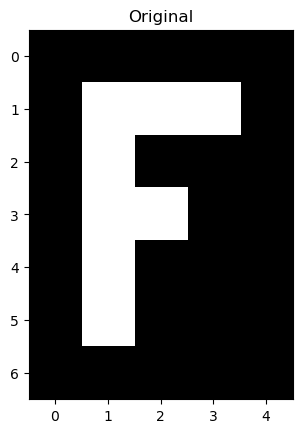

In [1]:
import numpy as np
from matplotlib import pyplot as plt

F = np.zeros((7,5), dtype=np.uint8)
# vertical line
F[1:6, 1] = 1
# upper line
F[1, 2:4] = 1
# middle point
F[3, 2] = 1

print(F)
plt.imshow(F, cmap='gray')
plt.title("Original")
plt.show()

# Rotate Classic

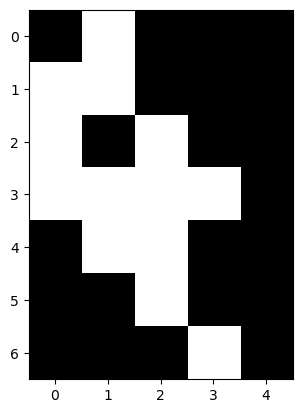

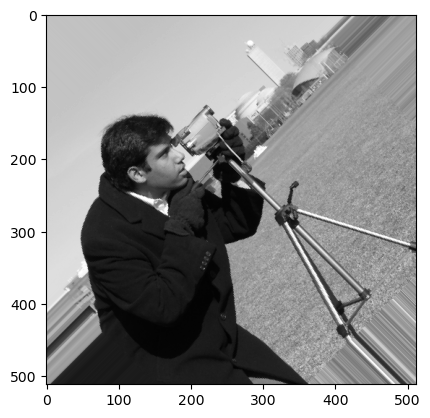

In [3]:
def rotate_classic(original, angle):
    fs = np.zeros(original.shape)
    rho = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rho), -np.sin(rho)],
                                [np.sin(rho), np.cos(rho)]])

    h, w = fs.shape
    h_orig, w_orig = original.shape

    y_trans, x_trans = h//2, w//2

    for y in range(h):
        for x in range(w):

            x_rot = rotation_matrix[0,0] * (x-x_trans) + rotation_matrix[0,1] * (y-y_trans)
            y_rot = rotation_matrix[1,0] * (x-x_trans) + rotation_matrix[1,1] * (y-y_trans)

            x_orig = int(x_rot) + x_trans
            y_orig = int(y_rot) + y_trans
            
            x_orig = min(max(x_orig, 0), w_orig-1)
            y_orig = min(max(y_orig, 0), h_orig-1)

            fs[y,x] = original[y_orig, x_orig]
    return fs

import imageio.v3 as iio
camera = iio.imread('imageio:camera.png')
plt.imshow(rotate_classic(F,45), cmap="gray")
plt.show()
plt.imshow(rotate_classic(camera,45), cmap="gray")
plt.show()

# Assignment: Write the missing code for the rotation in numpy.
hint: useful commands can be [np.meshgrid](https://numpy.org/doc/1.26/reference/generated/numpy.meshgrid.html#numpy-meshgrid), [np.dot](https://numpy.org/doc/1.26/reference/generated/numpy.dot.html#numpy.dot), [np.stack](https://numpy.org/doc/1.26/reference/generated/numpy.stack.html#numpy.stack), [np.reshape](https://numpy.org/doc/1.26/reference/generated/numpy.reshape.html#numpy-reshape), [np.clip](https://numpy.org/doc/1.26/reference/generated/numpy.clip.html#numpy.clip)

# Rotate Numpy

In [ ]:
def rotate_numpy(original, angle):

    rotated = np.zeros(original.shape)
    h, w = original.shape
    y_trans, x_trans = h//2, w//2
    
    rho = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rho), -np.sin(rho)],
                                [np.sin(rho), np.cos(rho)]])
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    rotated = original[(n_yy, n_xx)]
    return rotated

import imageio.v3 as iio
camera = iio.imread('imageio:camera.png')
plt.imshow(rotate_numpy(F,45), cmap="gray")
plt.show()
plt.imshow(rotate_numpy(camera,45), cmap="gray")
plt.show()

In [ ]:
%timeit rotate_classic(camera,45)
%timeit rotate_numpy(camera,45)